### О кейсе

Кейс состоит из последовательных вопросов

(отвечать на них обязательно, код и графики без интерпретации не имеют никакого смысла, **иначе - снижение баллов**), посвященных работе с табличными данными, но на более низком уровне с помощью Numpy

Баллы даются за выполнение отдельных пунктов

(Максимальное количество баллов за этот кейс - 10 (чтобы вам было проще оценивать свои успехи))

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Если эксперт заметит плагиат - баллы за ваше решения также снижаются.


# Кейс

## Часть 0. Подготовка [+0.5 балла]

**Задание 1 [+0.5 балла]**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

#### Скачиваем датасет с Kaggle

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"deed00","key":"82d7df00570472cd01fe528df40522bc"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c nyc-taxi-trip-duration
! unzip nyc-taxi-trip-duration.zip
! unzip sample_submission.zip
! unzip train.zip
! unzip test.zip

nyc-taxi-trip-duration.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nyc-taxi-trip-duration.zip
replace sample_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  sample_submission.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  train.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

%matplotlib inline

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 111.3+ MB


В колонке `dropoff_datetime` содержится информация о времени окончания поездки, однако эта колонка присутствует только в обучающей выборке и отсутствует в тестовой. Это создаёт проблему, так как при обучении модели мы не сможем использовать эту колонку для предсказаний на новых данных. В связи с этим, чтобы избежать ошибок и упростить анализ, рекомендуется удалить колонку `dropoff_datetime` из датасета.

Колонка `pickup_datetime` содержит дату и время начала поездки в формате строки, что затрудняет выполнение операций с датами и временем, таких как вычисление продолжительности поездки или анализ зависимости цены от времени суток. Преобразование этих данных в `datetime`-объекты позволит использовать методы для работы с датой (вместо огромного количества строк для решения какой-нибудь маленькой подзадачи будет использоваться один вызов метода)

In [ ]:
train.drop(columns=["dropoff_datetime"], inplace=True)

train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])


train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
test['pickup_datetime'] = pd.to_datetime(test["pickup_datetime"])

В колонке `trip_duration` содержится значение, которое мы стремимся предсказать. Давайте изучим распределение целевой переменной в обучающем наборе данных. Для этого построим гистограмму этой переменной.

Построение гистограммы целевой переменной важно по нескольким причинам:

1. **Понимание распределения**: Гистограмма помогает нам увидеть, как распределены значения целевой переменной. Это может дать представление о том, является ли распределение нормальным, скошенным или имеет выбросы.

2. **Выявление аномалий**: При анализе гистограммы мы можем обнаружить аномальные значения или выбросы, которые могут повлиять на качество модели.

3. **Выбор подходящего алгоритма**: Понимание распределения целевой переменной может помочь в выборе наиболее правильного анализа датасета. Например, если данные сильно скошены, может потребоваться преобразование данных перед обучением модели. (как на практическом занятии, если у нас таргет расположен по экспоненте, то было бы классно предсказывать логарифм, а не экспоненту (подробнее было на лекции))


In [ ]:
train_sample = train.sample(20000)

<Axes: xlabel='trip_duration', ylabel='Count'>

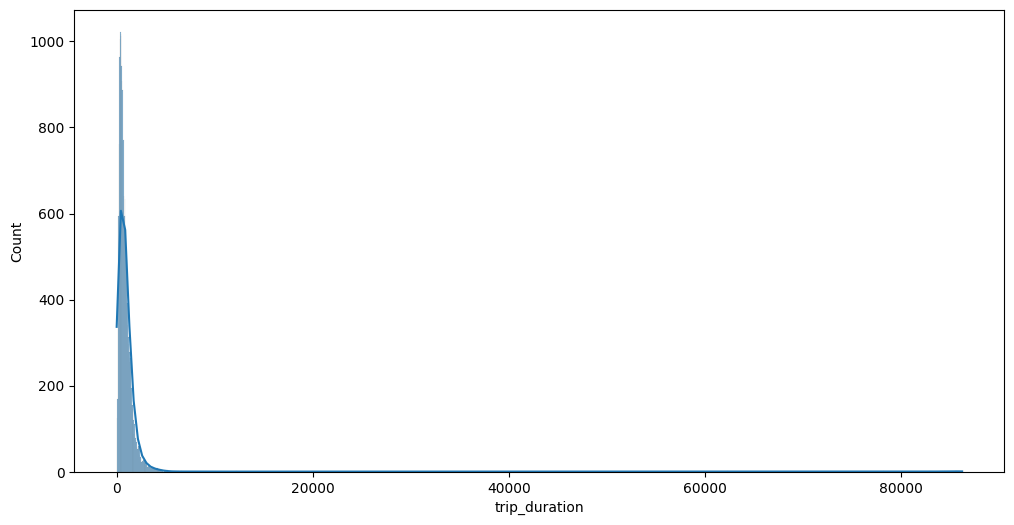

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=train_sample, x="trip_duration", kde=True, ax=ax)

<Axes: xlabel='trip_duration', ylabel='Count'>

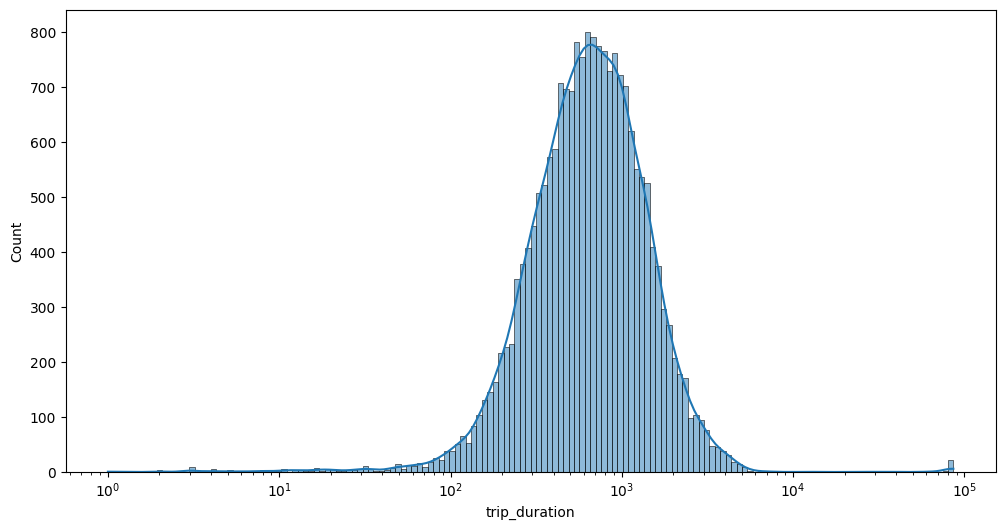

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xscale("log")
sns.histplot(data=train_sample, x="trip_duration", kde=True, ax=ax)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

***К-во поездок в зависимости от порядка длительности поездки выглядит как кривая нормального распределения***

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

Ответ: ***Так так при взятии логорифма рапределение наших данных становится нормальным и оценка становится более точной***

Мы изучили несколько вариантов линейной регрессии в sklearn, но все они минимизировали среднеквадратичную ошибку (MSE), а не среднеквадратичную логарифмическую ошибку (RMSLE). Для работы с RMSLE мы можем использовать следующий подход: вместо прямого предсказания целевой переменной, мы будем предсказывать ее логарифм. Пусть $\hat{y}_i = \log{(y_i + 1)}$ будет модифицированной целевой переменной, а $\hat{a}(x_i)$ — предсказание модели, обученной на $\hat{y}_i$. Чтобы получить исходное предсказание, мы используем обратное преобразование: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

\

Это преобразование позволяет нам оптимизировать MSE для логарифмированных значений, что эквивалентно оптимизации RMSLE для исходных значений. Это связано с тем, что минимизация квадратичной ошибки между логарифмами прогнозов и реальных значений соответствует минимизации логарифмической ошибки между самими прогнозами и реальными значениями ***(для дополнительного балла можете доказать почему)***. Таким образом, этот подход позволяет использовать стандартные методы линейной регрессии для задач, где требуется минимизировать RMSLE.






In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

***(Какая константа прекрасно оптимизирует RMSLE MSE (с преобразованиями?))***

In [ ]:
def rmsle(log1p_y_true, log1p_y_pred):
  return np.sqrt(np.mean(np.square(log1p_y_pred - log1p_y_true)))

rmsle_best_const = ... # как вычислить ее?
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4) # ответ конечно же нельзя подсматривать

Ellipsis


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Часть 1. Изучаем `pickup_datetime` & Обучаем модель [+1 балл]


**Задание 2 [+0.125 балла]**. Для начала давайте проанализируем общее количество поездок по дням. Построим график, отражающий зависимость числа поездок от конкретного дня в году (например, можно использовать `sns.countplot`).

Просмотр этой информации важен по нескольким причинам:

1. **Выявление закономерностей**: Анализ количества поездок по дням может помочь выявить определенные закономерности или тренды, например, повышенный спрос в выходные дни или праздничные периоды.

2. **Обнаружение аномалий**: График может помочь идентифицировать дни с необычно высоким или низким количеством поездок, что может указывать на наличие аномалий или особых событий.

3. **Корректировка моделей**: Если анализ показывает, что спрос сильно колеблется в зависимости от дня, это может потребовать учета этого фактора в моделях прогнозирования.

In [ ]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
df_1 = pd.DataFrame()
df_1['day_of_year'] = train['pickup_datetime'].dt.dayofyear
df_1['pickup_datetime'] = train['pickup_datetime'].dt.normalize()

<Axes: xlabel='day_of_year', ylabel='count'>

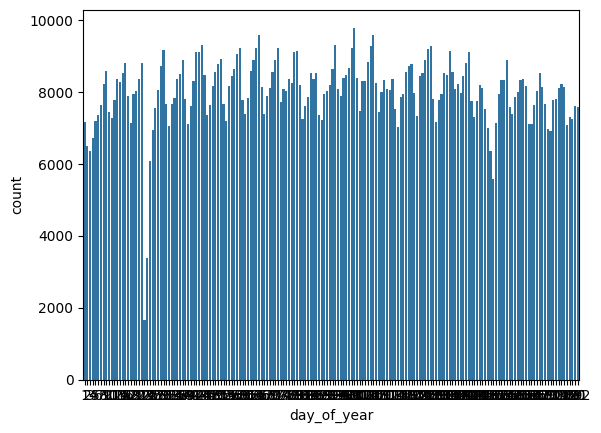

In [ ]:
sns.countplot(df_1, x='day_of_year')

In [ ]:
df_3 = df_1.groupby("day_of_year", as_index=False).value_counts()
df_3[df_3["count"] < 6000]

,day_of_year,pickup_datetime,count
22,23,2016-01-23,1648
23,24,2016-01-24,3383
150,151,2016-05-30,5570


<Axes: xlabel='week', ylabel='count'>

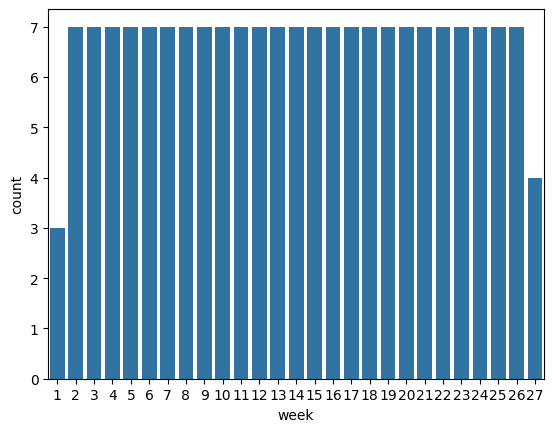

In [ ]:
df_2 = df_3
df_2['week'] = (df_2['pickup_datetime'].dt.isocalendar().week + 1) % 53

sns.countplot(df_2, x='week')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [ ]:
df = pd.DataFrame()
df['day_week'] = train['pickup_datetime'].dt.dayofweek
df['hour'] = train['pickup_datetime'].dt.hour
df = df.groupby("day_week", as_index=False)["hour"].value_counts()
df_test = pd.DataFrame()
df_test['day_week'] = test['pickup_datetime'].dt.dayofweek
df_test['hour'] = test['pickup_datetime'].dt.hour
df_test = df_test.groupby("day_week", as_index=False)["hour"].value_counts()
df

,day_week,hour,count
0,0,18,12959
1,0,19,12234
2,0,20,11334
3,0,21,11192
4,0,17,10857
...,...,...,...
163,6,4,4500
164,6,8,4333
165,6,7,2844
166,6,6,2149


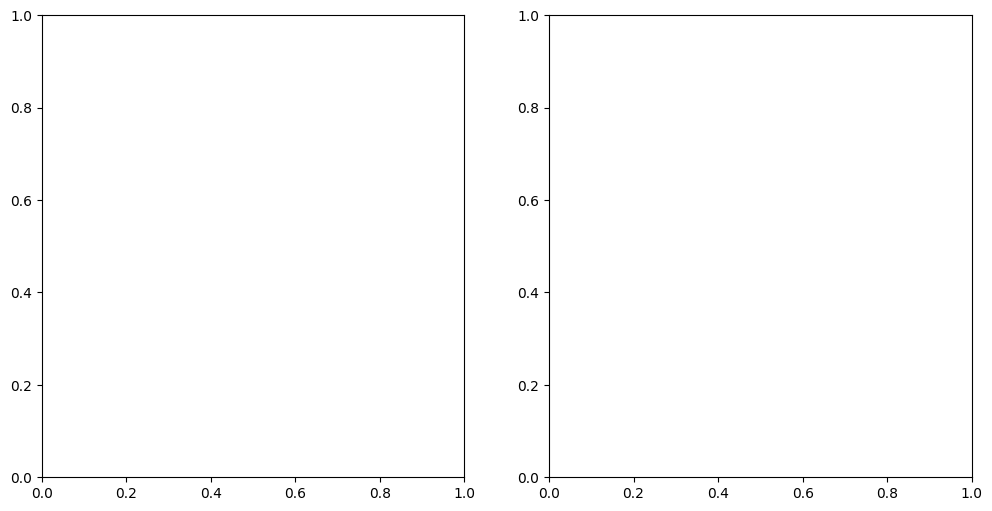

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:728: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:728: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


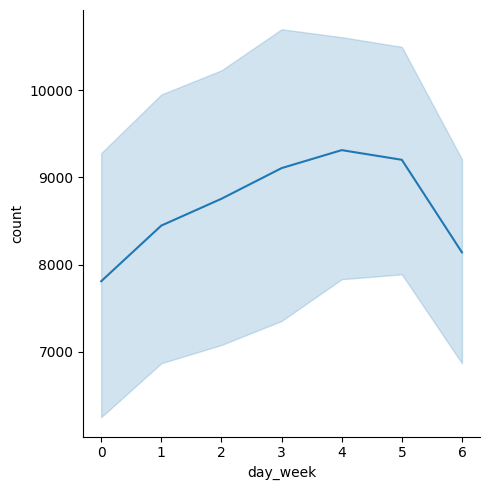

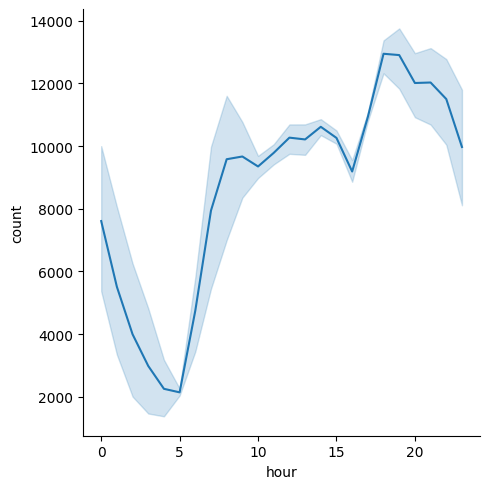

In [ ]:
sns.relplot(data=df, x='day_week', y='count', kind='line', ax=axes[0])
sns.relplot(data=df, x='hour', y='count', kind='line', ax=axes[1])

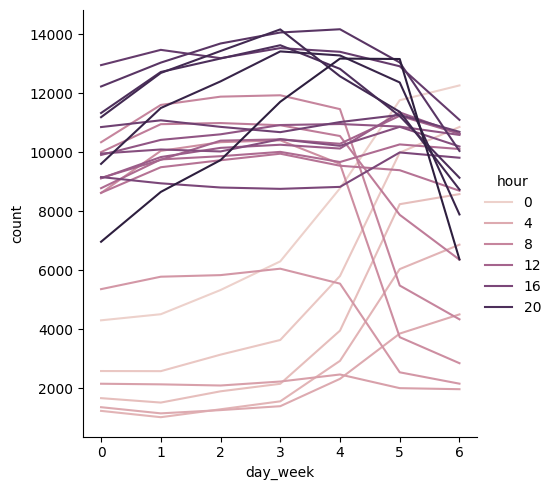

In [ ]:
sns.relplot(data=df, x='day_week', y='count', hue='hour',  kind='line')

**Задание 3 [+0.25 балла]**. Постройте график, на котором будет отображена зависимость числа поездок от времени суток для различных месяцев. Используйте разные цвета для кривых, соответствующих разным месяцам, с помощью параметра `hue` в `sns.relplot`. Аналогичным образом постройте график, показывающий зависимость количества поездок от часа в сутках для разных дней недели.

Это важно по нескольким причинам:

1. **Выявление временных закономерностей**: Графики помогут увидеть, как спрос на поездки меняется в течение суток в разные месяцы и дни недели. Это может выявить определенные тренды, например, пиковые часы поездок или временные периоды с низким спросом.

2. **Адаптация к сезонности и недельным циклам**: Понимание того, как спрос на поездки меняется в зависимости от времени года и дня недели, позволяет адаптировать модель машинного обучения и сделать правильный feature-engineering (правильную предобработку данных)




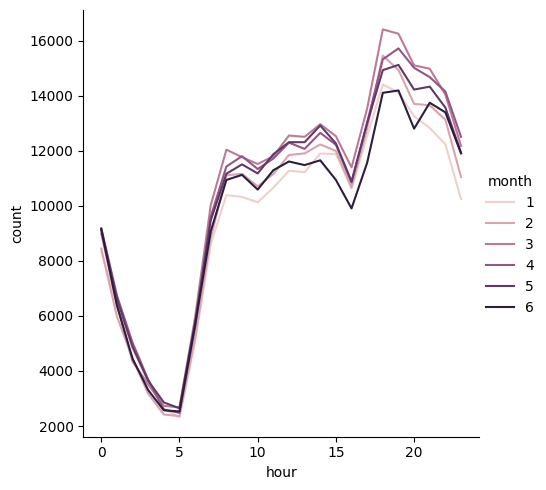

In [ ]:
df1 = train
df1["hour"] = df1["pickup_datetime"].dt.hour
df1["month"] = df1["pickup_datetime"].dt.month
df2 = df1.groupby("month", as_index=False)["hour"].value_counts()

sns.relplot(data=df2, x="hour", y="count", hue="month", kind="line")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это может быть связано?

На графике есть два аномальных периода. Это 23 и 24 января. В этот день в Нью-Йорке была сильная снежная буря. 30 мая в Манхетене произошел взрыв.

**Задание 4 [+0.25 балла]**. Разделите данные на обучающую и тестовую выборки в соотношении 80:20 с помощью функции `train_test_split` из библиотеки `sklearn`. На основе обучающей выборки постройте график, показывающий зависимость логарифма среднего времени поездки от дня недели. Повторите этот процесс для часа в сутках и дня в году.

Посмотреть график распределения тренировочной выборки важно по нескольким причинам:

1. **Понимание данных**: Анализ тренировочной выборки помогает лучше понять распределение и характеристики данных, что важно для выбора и настройки моделей машинного обучения

2. **Выявление закономерностей**: Графики зависимостей могут выявить важные закономерности и тренды в данных, которые могут быть использованы для улучшения моделей прогнозирования.

3. **Избежание переобучения**: Анализируя только тренировочную выборку, мы избегаем риска "заглядывания в будущее" и переобучения модели, когда она слишком хорошо подгоняется под тестовые данные.


In [ ]:
data = train

In [ ]:
from sklearn.model_selection import train_test_split

y = data["pickup_datetime"]
X = data.drop(columns=["pickup_datetime"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_year,hour,month
599669,id2277492,1,1,-73.971176,40.758472,-73.972221,40.756317,N,77,54,9,2
1224682,id2529208,2,1,-73.992683,40.713943,-73.986366,40.722267,N,316,146,22,5
78001,id3786165,1,1,-74.005226,40.723030,-73.977631,40.778008,N,1276,174,21,6
990137,id1428502,1,1,-73.991692,40.754677,-73.981857,40.746437,N,449,60,8,2
498353,id2968261,2,1,-73.952644,40.772453,-73.976669,40.780743,N,581,35,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,id1130068,2,1,-73.872879,40.774052,-73.925018,40.759640,N,683,166,22,6
152315,id3416393,1,1,-73.985619,40.757359,-73.987984,40.757030,N,142,72,20,3
963395,id2047807,1,1,-73.994186,40.755886,-74.016571,40.704746,N,995,3,10,1
117952,id1634041,1,1,-73.982277,40.765305,-73.973473,40.757809,N,821,64,8,3


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Добавьте следующие признаки на основе `pickup_datetime` (не зря мы преобразовывали это в первых этапах):
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Разбиение даты на отдельные признаки важно по нескольким причинам:

1. **Выявление временных закономерностей**: Разделение даты на день недели, месяц и час помогает выявить закономерности в данных, связанные с временем суток, днями недели и сезонностью.

2. **Улучшение прогностической способности модели**: Добавление этих признаков может улучшить точность моделей машинного обучения, поскольку они могут захватывать важные временные зависимости в данных.

3. **Адаптация к аномальным событиям**: Бинарные признаки, указывающие на аномальные периоды, позволяют модели учитывать особые ситуации, которые могут существенно отличаться от обычных условий.

4. **Повышение интерпретируемости**: Разбиение даты на отдельные компоненты делает модель более интерпретируемой, позволяя легче понять, как различные временные факторы влияют на целевую переменную.

In [ ]:
train["day_of_week"] = train["pickup_datetime"].dt.dayofweek
train["month"] = train["pickup_datetime"].dt.month
train["hour"] = train["pickup_datetime"].dt.hour
train["day_of_year"] = train["pickup_datetime"].dt.dayofyear
test["day_of_week"] = test["pickup_datetime"].dt.dayofweek
test["month"] = test["pickup_datetime"].dt.month
test["hour"] = test["pickup_datetime"].dt.hour
test["day_of_year"] = test["pickup_datetime"].dt.dayofyear


In [ ]:
train[['day_of_week', "month", "hour", "day_of_year"]]

,day_of_week,month,hour,day_of_year
0,0,3,17,74
1,6,6,0,164
2,1,1,11,19
3,2,4,19,97
4,5,3,13,86
...,...,...,...,...
1458639,4,4,13,99
1458640,6,1,7,10
1458641,4,4,6,113
1458642,1,1,15,5


In [ ]:
train['day_of_week'].value_counts()

day_of_week
4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: count, dtype: int64

In [ ]:
train["month"].value_counts()

month
3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: count, dtype: int64

In [ ]:
train["hour"].value_counts()

hour
18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: count, dtype: int64

In [ ]:
train["day_of_year"].value_counts()

day_of_year
100    9796
107    9602
65     9597
93     9325
44     9309
       ... 
3      6353
25     6084
151    5570
24     3383
23     1648
Name: count, Length: 182, dtype: int64

In [ ]:
len(set(train["day_of_year"]))

182

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 [+0.375 балла]**.
Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

Применение `OneHotEncoder` и `StandardScaler` важно по следующим причинам:

1. **OneHotEncoder для категориальных признаков**: Категориальные признаки необходимо преобразовать в числовой формат перед использованием в линейной регрессии. `OneHotEncoder` преобразует категориальные переменные в бинарные векторы, что позволяет модели корректно интерпретировать эти признаки без внесения искажений, связанных с порядком значений.

2. **StandardScaler для численных признаков**: Масштабирование численных признаков с помощью `StandardScaler` помогает стандартизировать данные, приводя их к одному масштабу с нулевым средним и единичным стандартным отклонением. Это улучшает интерпретацию весов линейной модели (а также мы обсудим на лекции, почему это ускоряет обучение модели)


In [ ]:
transform_1_part = ColumnTransformer([("scaler", StandardScaler(), ['hour', "day_of_year"]), ("onehot", OneHotEncoder(handle_unknown='ignore'), ["day_of_week", "month"])])
pipe_1_part = Pipeline([('tranas', transform_1_part), ('Ridge', Ridge())])
pipe_1_part.fit(train[['day_of_week', "month", "hour", "day_of_year"]], train['trip_duration'])
pred_1_part = pipe_1_part.predict(test[['day_of_week', "month", "hour", "day_of_year"]])
RMSLE_1_part = mean_squared_log_error(pred_1_part, sample_submission['trip_duration']) ** 0.5
RMSLE_1_part

0.05877362771066435

## Часть 2. Изучаем координаты & Обучаем модель [+1.5 балла]




Теперь, когда мы подробно изучили временные аспекты данных о поездках, давайте переключим наше внимание на географические данные, а именно на координаты начала и конца поездок. Мы предоставили вам функцию, которая отображает на карте точки начала или конца поездок. Однако обратите внимание, что для эффективности этой функции мы используем только небольшой фрагмент данных, иначе обработка займет слишком много времени.

Анализ координат важен по нескольким причинам:

1. **Пространственный анализ**: Координаты позволяют проводить пространственный анализ, который может выявить географические закономерности в данных, такие как популярные места отправления и назначения, районы с высоким спросом и т. д.

2. **Улучшение точности прогнозов**: Включение географических признаков в модели прогнозирования может повысить их точность, поскольку координаты могут быть связаны с различными факторами, влияющими на длительность поездок и спрос на транспортные услуги.

In [ ]:
import folium
df = train
df_test = test

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    Рисует карту с кругами, представляющими точки данных.

    Параметры
    ----------
    data : DataFrame
        DataFrame, содержащий колонки с широтой и долготой.
    latitude_column : str
        Название колонки в DataFrame, содержащей координаты широты.
    longitude_column : str
        Название колонки в DataFrame, содержащей координаты долготы.
    color : str
        Цвет кругов, которые будут нарисованы на карте.

    Возвращает
    -------
    folium.Map
        Объект карты Folium с нарисованными кругами в указанных координатах.

    Примеры
    --------
    >>> import pandas as pd
    >>> data = pd.DataFrame({
    ...     'latitude': [37.773972, 37.774159],
    ...     'longitude': [-122.431297, -122.431297]
    ... })
    >>> show_circles_on_map(data, 'latitude', 'longitude', 'blue')
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

In [ ]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_year,hour,month,day_of_week
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,74,17,3,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,164,0,6,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,11,1,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,97,19,4,2
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,86,13,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,99,13,4,4
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,10,7,1,6
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,113,6,4,4
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5,15,1,1


**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Большое количетво отправление было из аэропортов, вокзалов или зон рядом с вокзалами.


**Задание 6 [+0.375 балла]**. Как нам хорошо известно, время поездки $t$ связано с расстоянием $s$ и средней скоростью $v_{\text{ср}}$ соотношением $t = s / v_{\text{ср}}$. Из этого следует, что расстояние между начальной и конечной точками поездки является одним из ключевых факторов, влияющих на время поездки. Хотя мы не можем точно определить полный маршрут, который преодолеет такси, мы можем оценить это расстояние, рассчитав кратчайшее расстояние между точками начала и конца поездки. Для корректного вычисления расстояния между двумя точками на поверхности Земли можно использовать функцию `haversine`. Рассчитайте кратчайшее расстояние для каждого объекта в данных и сохраните его в колонку `haversine`.

Это важно по нескольким причинам:

1. **Улучшение точности модели**: Включение расстояния как признака в модель может значительно улучшить точность прогнозирования времени поездки, поскольку оно напрямую влияет на длительность поездки.

2. **Понимание взаимосвязей**: Анализ зависимости времени поездки от расстояния может помочь выявить взаимосвязи и закономерности в данных, что полезно для понимания динамики транспортных потоков.


In [ ]:
def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 # this is in miles.  For Earth radius in kilometers use 6372.8 km

      dLat = np.radians(lat2 - lat1)
      dLon = np.radians(lon2 - lon1)
      lat1 = np.radians(lat1)
      lat2 = np.radians(lat2)

      a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
      c = 2 * np.arcsin(np.sqrt(a))

      return R * c

'''# Usage
lon1 = -103.548851
lat1 = 32.0004311
lon2 = -103.6041946
lat2 = 33.374939

print(haversine(lat1, lon1, lat2, lon2))'''


'# Usage\nlon1 = -103.548851\nlat1 = 32.0004311\nlon2 = -103.6041946\nlat2 = 33.374939\n\nprint(haversine(lat1, lon1, lat2, lon2))'

In [ ]:
df['haversine'] = haversine(df["pickup_latitude"], df["pickup_longitude"], df["dropoff_latitude"], df["dropoff_longitude"])
df = df.loc[df['haversine'] > 0]
df_test['haversine'] = haversine(df_test["pickup_latitude"], df_test["pickup_longitude"], df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test = df_test.loc[df_test['haversine'] > 0]
df, df_test

(                id  vendor_id     pickup_datetime  passenger_count  \
 0        id2875421          2 2016-03-14 17:24:55                1   
 1        id2377394          1 2016-06-12 00:43:35                1   
 2        id3858529          2 2016-01-19 11:35:24                1   
 3        id3504673          2 2016-04-06 19:32:31                1   
 4        id2181028          2 2016-03-26 13:30:55                1   
 ...            ...        ...                 ...              ...   
 1458639  id2376096          2 2016-04-08 13:31:04                4   
 1458640  id1049543          1 2016-01-10 07:35:15                1   
 1458641  id2304944          2 2016-04-22 06:57:41                1   
 1458642  id2714485          1 2016-01-05 15:56:26                1   
 1458643  id1209952          1 2016-04-05 14:44:25                1   
 
          pickup_longitude  pickup_latitude  dropoff_longitude  \
 0              -73.982155        40.767937         -73.964630   
 1            

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
df['log_haversine'] = df['haversine'].apply(np.log)
df['log_trip_duration'] = df['trip_duration'].apply(np.log)
df_test['log_haversine'] = df_test['haversine'].apply(np.log)

df, df_test

<ipython-input-122-b28b7c2d6dc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_haversine'] = df['haversine'].apply(np.log)
<ipython-input-122-b28b7c2d6dc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_trip_duration'] = df['trip_duration'].apply(np.log)
<ipython-input-122-b28b7c2d6dc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

(                id  vendor_id     pickup_datetime  passenger_count  \
 0        id2875421          2 2016-03-14 17:24:55                1   
 1        id2377394          1 2016-06-12 00:43:35                1   
 2        id3858529          2 2016-01-19 11:35:24                1   
 3        id3504673          2 2016-04-06 19:32:31                1   
 4        id2181028          2 2016-03-26 13:30:55                1   
 ...            ...        ...                 ...              ...   
 1458639  id2376096          2 2016-04-08 13:31:04                4   
 1458640  id1049543          1 2016-01-10 07:35:15                1   
 1458641  id2304944          2 2016-04-22 06:57:41                1   
 1458642  id2714485          1 2016-01-05 15:56:26                1   
 1458643  id1209952          1 2016-04-05 14:44:25                1   
 
          pickup_longitude  pickup_latitude  dropoff_longitude  \
 0              -73.982155        40.767937         -73.964630   
 1            

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
your_df = df
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 [+0.375 балла]**. Давайте проанализируем среднюю скорость движения такси. Для каждого объекта в обучающей выборке вычислите среднюю скорость, разделив значение в колонке `haversine` на значение в колонке `trip_duration`. Затем постройте гистограмму распределения полученных значений средней скорости.


<ipython-input-124-37cf2374c794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avv_speed'] = df['haversine'] / (df['trip_duration'] // 3600)


<Axes: xlabel='avv_speed', ylabel='Count'>

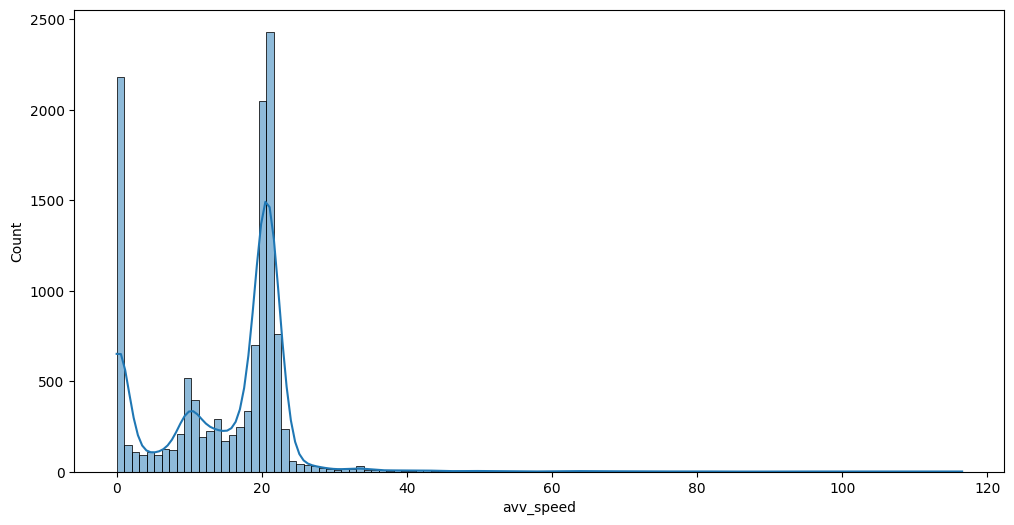

In [ ]:
df['avv_speed'] = df['haversine'] / (df['trip_duration'] // 3600)
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x= "avv_speed", kde=True, ax=ax)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: xlabel='avv_speed', ylabel='Count'>

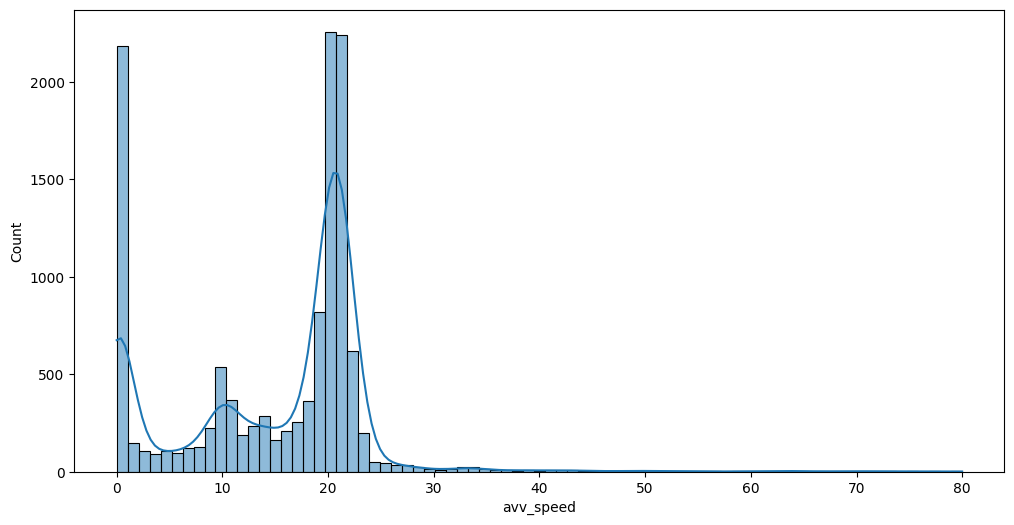

In [ ]:
df = df.loc[df['avv_speed']<=80]

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x="avv_speed", kde=True, ax=ax)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 8 [+0.625 балла]**. Сейчас мы практически не используем прямые значения координат в анализе. Это связано с тем, что широта и долгота по отдельности не несут значимой информации, а их взаимосвязь с целевой переменной нелинейна. Чтобы эффективно интегрировать координаты в наш анализ, мы можем применить следующий подход: окружим область с наибольшим количеством поездок прямоугольником и разделим этот прямоугольник на ячейки. Каждой точке присвоим номер ячейки, в которой она находится, а точкам вне прямоугольника присвоим значение -1.

Создайте трансформер, который вначале делит указанную область на ячейки, а затем генерирует два признака: номер ячейки начала поездки и номер ячейки конца поездки. Выбор количества строк и столбцов оставьте на ваше усмотрение.

Важно, чтобы все вычисления были векторизованными, трансформер не изменял исходный набор данных, а все необходимые статистики вычислялись только по обучающей выборке в методе `fit`.

Этот подход важен по следующим причинам:

1. **Учет пространственной структуры**: Разбиение на ячейки позволяет учесть пространственную структуру данных, что может улучшить качество анализа и прогнозирования.

2. **Снижение размерности**: Преобразование координат в номера ячеек уменьшает размерность данных, что упрощает анализ и сокращает время вычислений.

3. **Улучшение интерпретируемости**: Номера ячеек могут быть более интерпретируемыми, чем сырые координаты, что облегчает понимание взаимосвязей в данных.

4. **Адаптация к нелинейным зависимостям**: Такой подход позволяет адаптироваться к нелинейным зависимостям между координатами и целевой переменной, что может повысить точность моделей.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    """
    Трансформер для преобразования географических координат в номера ячеек сетки.

    Параметры
    ----------
    n_rows : int
        Количество строк сетки.
    n_cols : int
        Количество столбцов сетки.
    lat_min : float
        Минимальная широта области.
    lat_max : float
        Максимальная широта области.
    lon_min : float
        Минимальная долгота области.
    lon_max : float
        Максимальная долгота области.

    Атрибуты
    ----------
    cell_size_lat : float
        Размер ячейки сетки по широте.
    cell_size_lon : float
        Размер ячейки сетки по долготе.

    Методы
    -------
    fit(X, y=None)
        Находит параметры сетки на основе данных.
    transform(X)
        Преобразует координаты в номера ячеек сетки.
    show_map()
        Отображает карту с ячейками сетки.
    """

    def __init__(self, n_rows, n_cols, lat_min, lat_max, lon_min, lon_max):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = lat_min
        self.lat_max = lat_max
        self.lon_min = lon_min
        self.lon_max = lon_max


        self.cell_size_lat = (self.lat_max - self.lat_min) / self.n_rows
        self.cell_size_lon = (self.lon_max - self.lon_min) / self.n_cols

    def fit(self, X=None, y=None):
        """
        Находит параметры сетки на основе данных.

        Параметры
        ----------
        X : array-like, shape [n_samples, 2]
            Входные данные с координатами (широта, долгота).
        y : Ignored
            Не используется, существует для совместимости со стандартами sklearn.

        Возвращает
        -------
        self : object
            Возвращает себя.
        """
        return self

    def transform(self, X):
        """
        Преобразует координаты в номера ячеек сетки.

        Параметры
        ----------
        X : array-like, shape [n_samples, 2]
            Входные данные с координатами (широта, долгота).

        Возвращает
        -------
        X_transformed : array, shape [n_samples, 2]
            Преобразованные данные с номерами ячеек (номер строки, номер столбца).
        """

        X = np.array(X)


        row_indices = ((X[:, 0] - self.lat_min) / self.cell_size_lat).astype(int)
        col_indices = ((X[:, 1] - self.lon_min) / self.cell_size_lon).astype(int)


        row_indices[row_indices < 0] = -1
        row_indices[row_indices >= self.n_rows] = -1
        col_indices[col_indices < 0] = -1
        col_indices[col_indices >= self.n_cols] = -1

        X_transformed = np.column_stack((row_indices, col_indices))
        return X_transformed

    def show_map(self):
        """
        Отображает карту с ячейками сетки.
        """

        location = ((self.lat_min+self.lat_max)/2, (self.lon_min+self.lon_max)/2)
        m = folium.Map(location=location)

        color="red"

        # horizontal lines
        for i in range(self.n_rows):
          for j in range(self.n_cols):
            folium.Circle(
                radius=100,
                location=(self.lat_min+i*self.cell_size_lat + self.cell_size_lat/2, self.lon_min+j*self.cell_size_lon + self.cell_size_lon/2),
                color=color,
                fill_color=color,
                fill=True
            ).add_to(m)
            folium.Rectangle(bounds=[(self.lat_min+i*self.cell_size_lat,self.lon_min+j*self.cell_size_lon),(self.lat_min+(i+1)*self.cell_size_lat,self.lon_min+(j+1)*self.cell_size_lon)], color=color).add_to(m)
            pass

        return m

In [ ]:
mapTransformer = MapGridTransformer(3,4, train["pickup_latitude"].min(), train["pickup_latitude"].max(), train["pickup_longitude"].min(), train["pickup_longitude"].max())
mapTransformer.show_map()

**Задание 9 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Часть 3. Изучаем оставшиеся признаки & Обучаем модель [+0.5 балла]


**Задание 10 [+0.375 балла]**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
vendor_id_count = len(train['vendor_id'].unique())
passenger_count_count = len(train['passenger_count'].unique())
fwd_count = len(train['store_and_fwd_flag'].unique())
vendor_id_count, passenger_count_count, fwd_count

(2, 10, 2)

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: xlabel='vendor_id', ylabel='natural_log_trip_duration'>

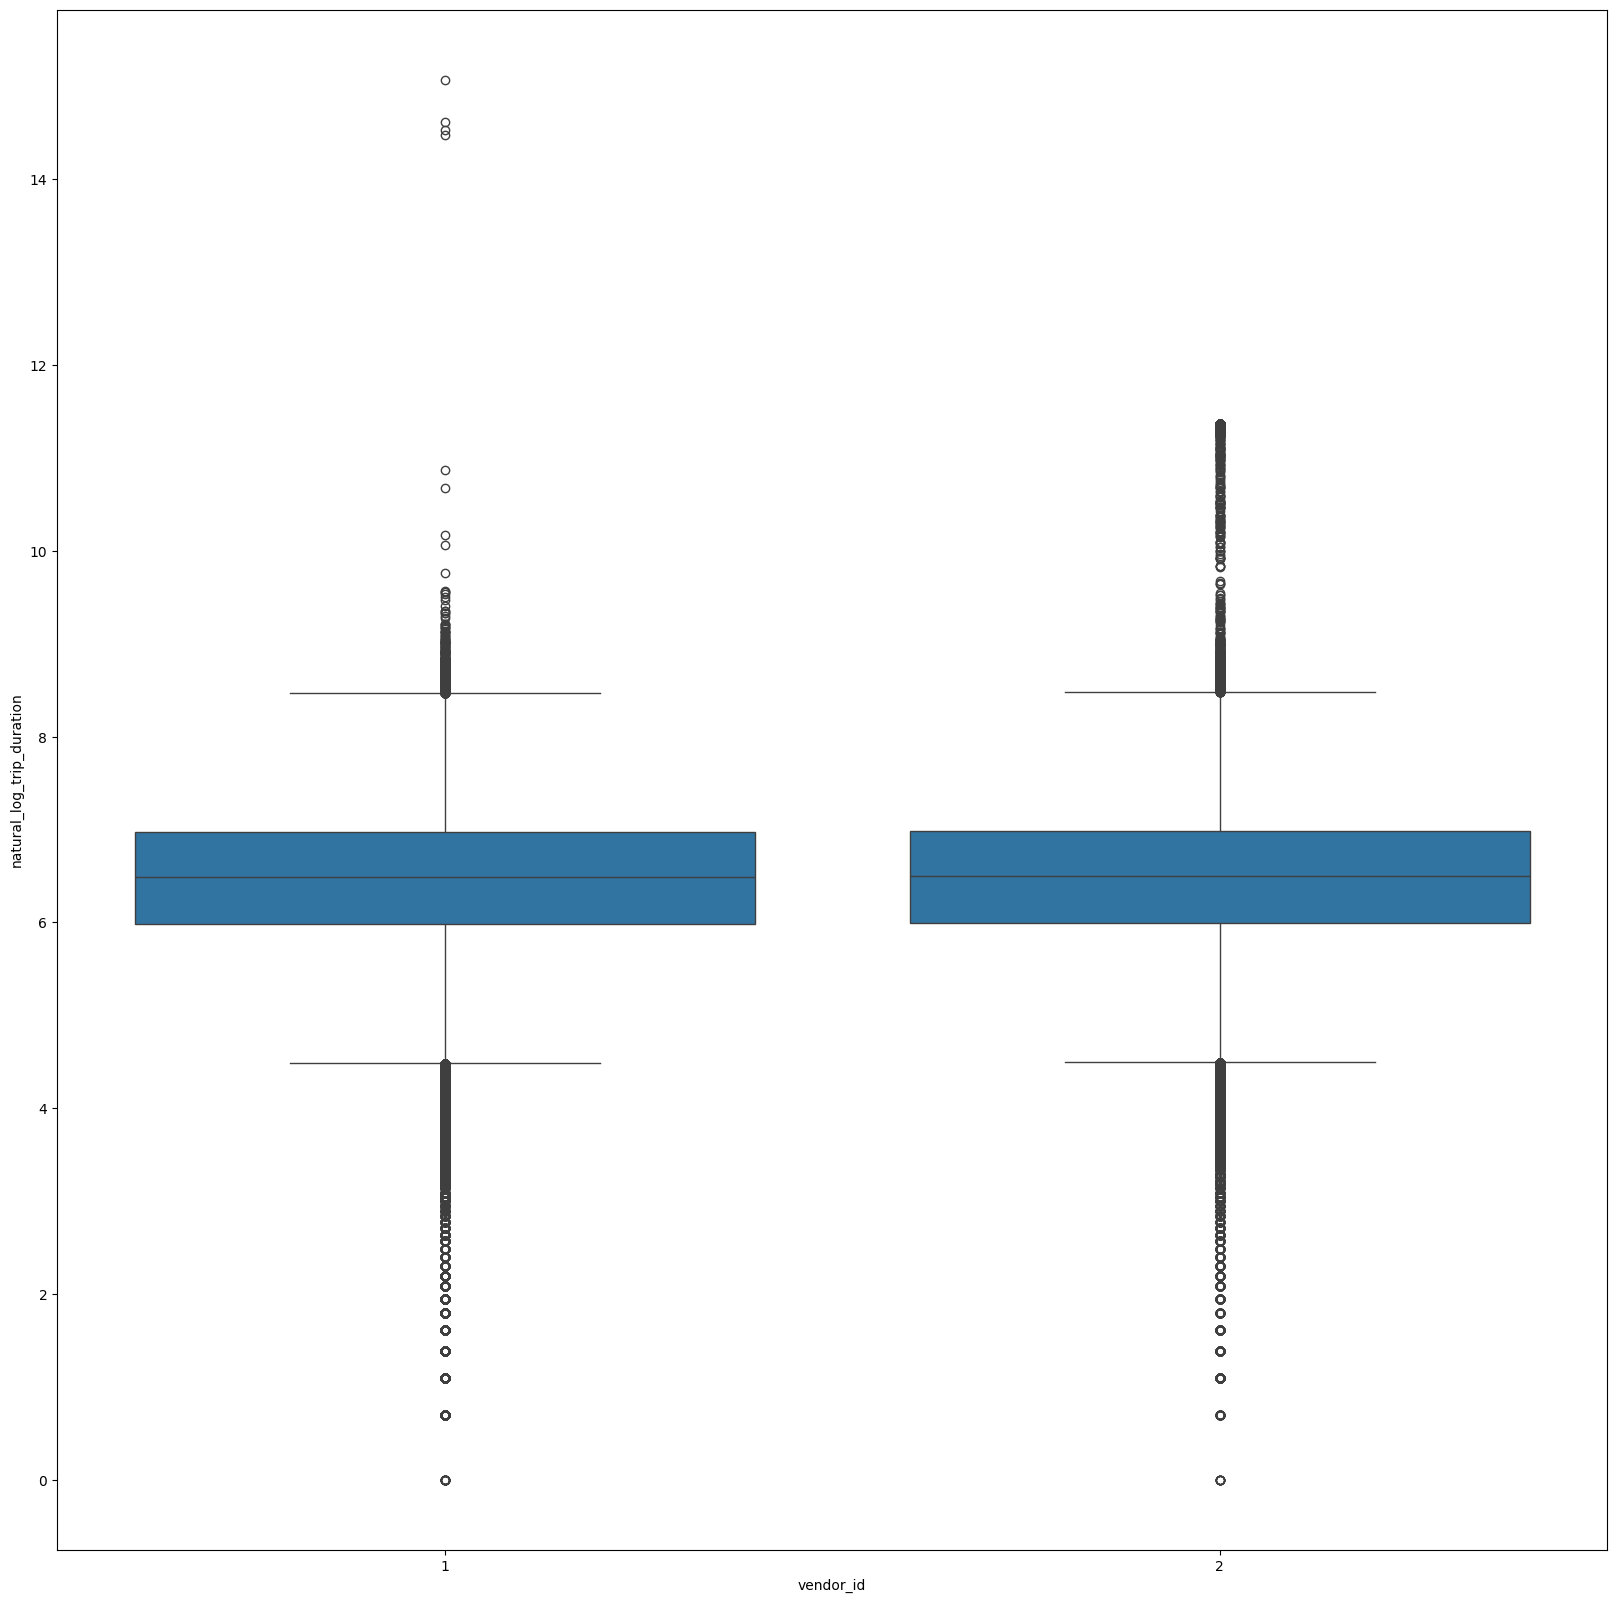

In [ ]:
import seaborn as sns
train['natural_log_trip_duration'] = np.log(train['trip_duration'])
plt.figure(figsize = (20, 20))
sns.boxplot(data = train, x = 'vendor_id', y = 'natural_log_trip_duration')
#train.boxplot(column = ['natural_log_trip_duration'], by = ['vendor_id'], grid= False , color='black', layout = (100, 100))

<Axes: xlabel='passenger_count', ylabel='natural_log_trip_duration'>

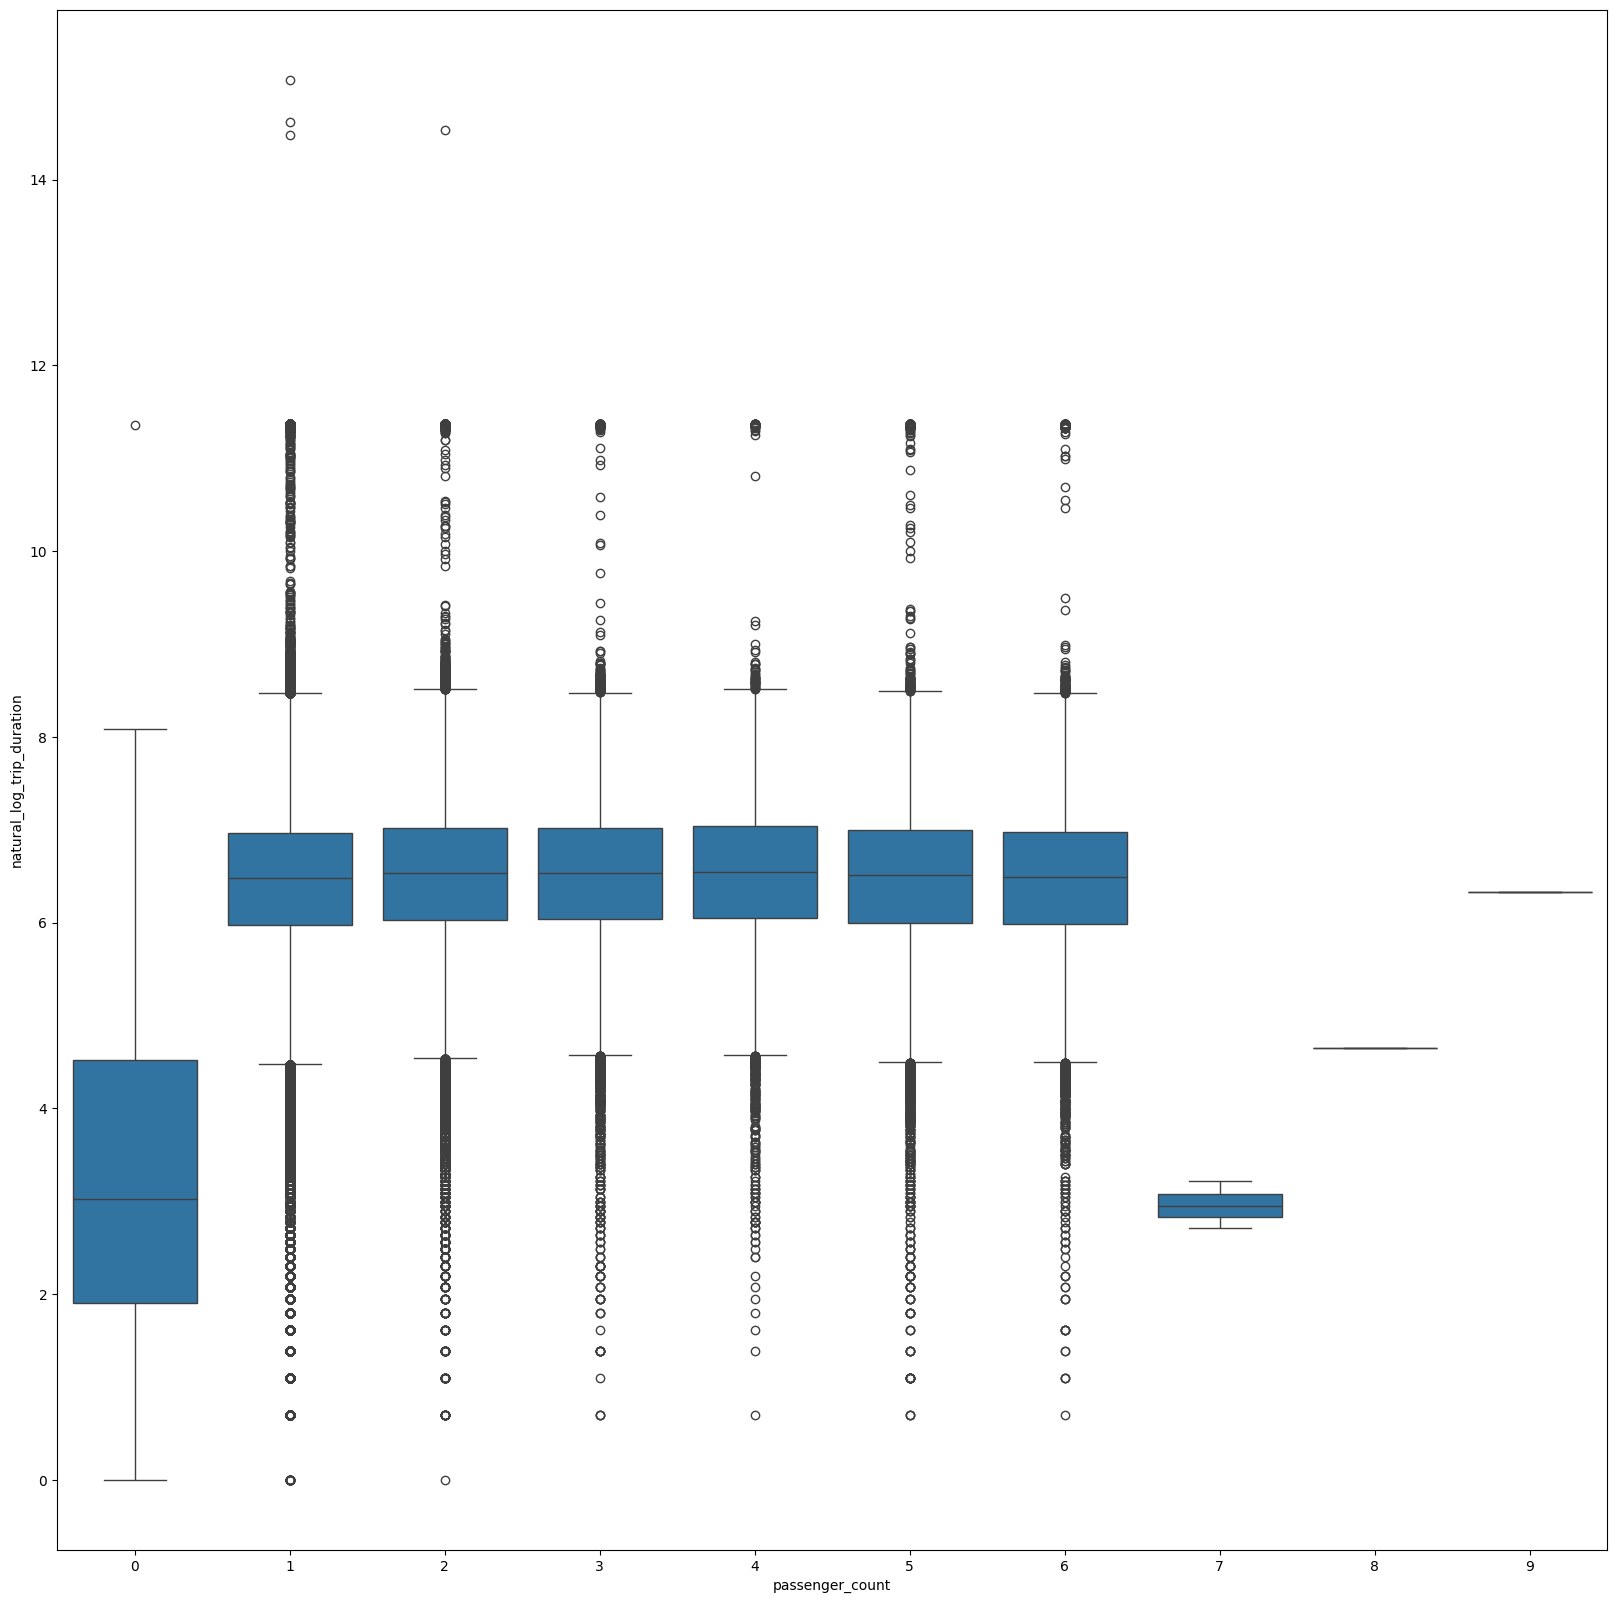

In [ ]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train, x = 'passenger_count', y = 'natural_log_trip_duration')
# train['natural_log_trip_duration'] = np.log(train['trip_duration'])
# train.boxplot(column = ['natural_log_trip_duration'], by = ['passenger_count'], grid= False , color='black')

<Axes: xlabel='store_and_fwd_flag', ylabel='natural_log_trip_duration'>

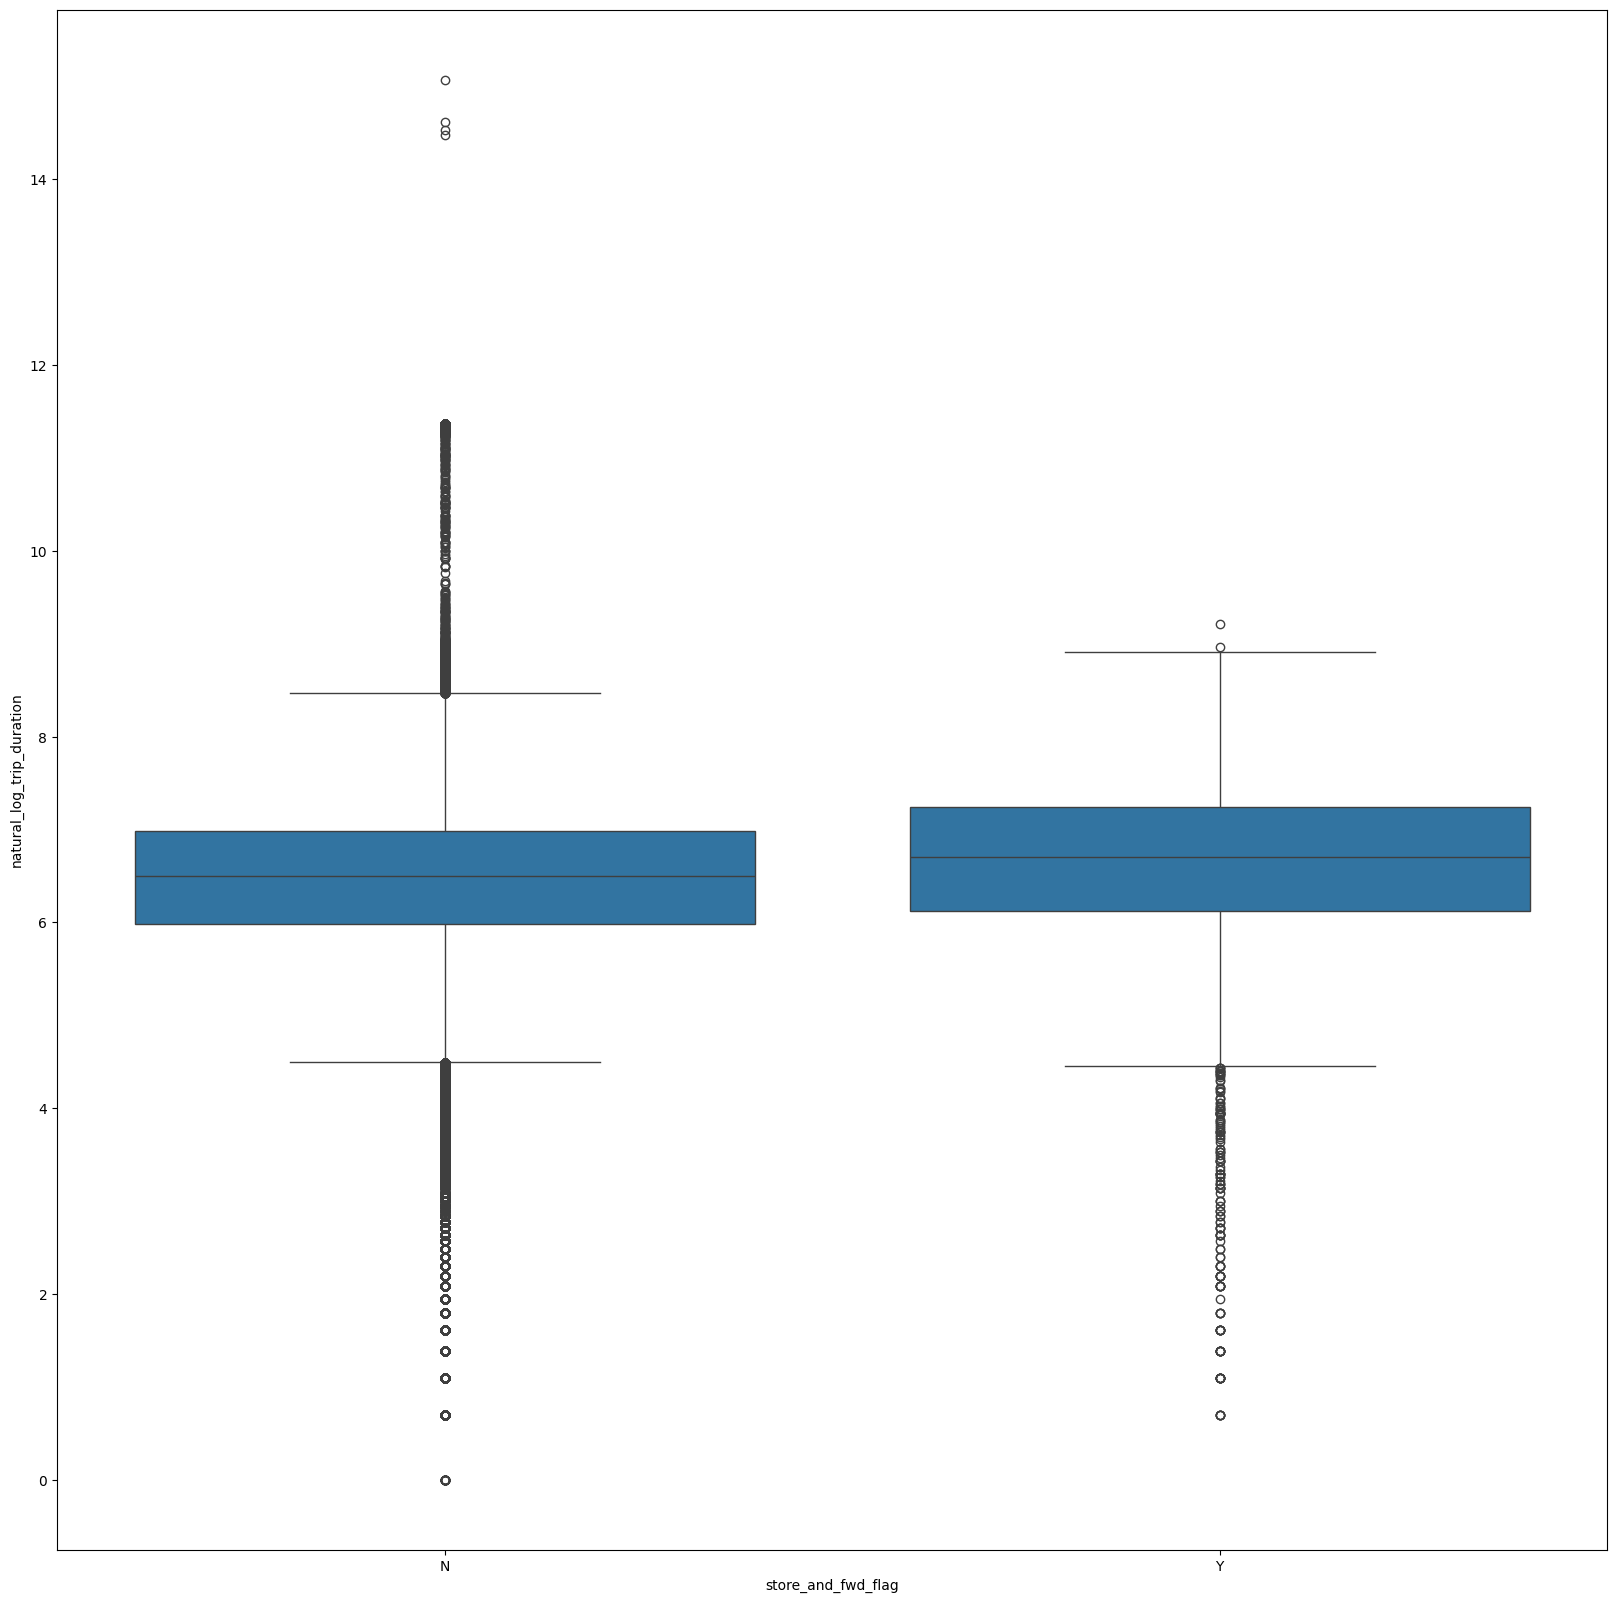

In [ ]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = train, x = 'store_and_fwd_flag', y = 'natural_log_trip_duration')
# train['natural_log_trip_duration'] = np.log(train['trip_duration'])
# train.boxplot(column = ['natural_log_trip_duration'], by = ['store_and_fwd_flag'], grid= False , color='black')

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
train['vendor_id'] = (train['vendor_id'] == 1).astype(int)
train['store_and_fwd_flag'] = (train['store_and_fwd_flag'] == 'Y').astype(int)

test['vendor_id'] = (test['vendor_id'] == 1).astype(int)
test['store_and_fwd_flag'] = (test['store_and_fwd_flag'] == 'Y').astype(int)


train.head(), test.head()

(          id  vendor_id     pickup_datetime  passenger_count  \
 0  id2875421          0 2016-03-14 17:24:55                1   
 1  id2377394          1 2016-06-12 00:43:35                1   
 2  id3858529          0 2016-01-19 11:35:24                1   
 3  id3504673          0 2016-04-06 19:32:31                1   
 4  id2181028          0 2016-03-26 13:30:55                1   
 
    pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
 0        -73.982155        40.767937         -73.964630         40.765602   
 1        -73.980415        40.738564         -73.999481         40.731152   
 2        -73.979027        40.763939         -74.005333         40.710087   
 3        -74.010040        40.719971         -74.012268         40.706718   
 4        -73.973053        40.793209         -73.972923         40.782520   
 
    store_and_fwd_flag  trip_duration  day_of_year  hour  month  day_of_week  \
 0                   0            455           74    17  

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 11 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
transform_3_part = ColumnTransformer([("scaler", StandardScaler(), ['passenger_count']), ("onehot", OneHotEncoder(handle_unknown='ignore'), ["vendor_id", "store_and_fwd_flag"])])
pipe_3_part = Pipeline([('trans', transform_3_part), ('Ridge', Ridge())])
pipe_3_part.fit(train[['vendor_id', 'store_and_fwd_flag', 'passenger_count']], train['natural_log_trip_duration'])
pred_3_part = pipe_3_part.predict(test[['vendor_id', 'store_and_fwd_flag', 'passenger_count']])
RMSLE_3_part = mean_squared_log_error(pred_3_part, sample_submission['trip_duration'])**0.5
RMSLE_3_part


4.856783121274226

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель [+1.5 балла]

**Задание 12 [+0.5 балла]**. В нашем наборе данных присутствуют аномальные записи: объекты с необычно коротким временем поездки, слишком большим пройденным расстоянием или с большими остатками после регрессии. В этом задании предлагается исключить такие объекты из обучающего набора. Для этого постройте гистограммы распределения указанных величин, определите объекты, которые можно считать выбросами, и очистите __обучающий набор__ от них.

Следует отметить, что, несмотря на то что эти объекты кажутся выбросами, в тестовом наборе данных также могут присутствовать объекты с аналогичными аномальными значениями. Поэтому удаление выбросов из обучающего набора может привести к ухудшению качества на тестовом наборе. Однако, в целом, рекомендуется удалять выбросы из обучающего набора, чтобы получить более разумную и интерпретируемую модель.

Для определения выбросов можно использовать различные методы, такие как:

- **Z-оценка**: Выбросы определяются как объекты, у которых абсолютное значение Z-оценки (стандартизированное значение) превышает определенный порог (например, 3).

- **IQR (межквартильный размах)**: Выбросы определяются как объекты, значения которых выходят за пределы [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], где Q1 и Q3 — первый и третий квартили соответственно.


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы сделали до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

**Задание 13 [+0.5 балла]**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

По тренировочной выборке с помощью кросс-валидации (`zGridSearchCV`) подберите оптимальные значения параметра регуляризации (alpha, lambda в разных литературах по-разному) для `Ridge` и `Lasso` на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 14 [+0.5 балла]**. Использование взаимодействия признаков часто оказывается полезным для улучшения качества модели. Мы уже разделили карту Манхэттена на ячейки и создали признаки, указывающие на ячейку начала и окончания поездки.

Теперь предлагается пойти дальше и посчитать, как часто встречается каждая возможная пара этих признаков в нашем наборе данных. Затем выберем 100 самых частых пар и закодируем поездки с этими парами как категориальный признак, а для остальных объектов установим значение -1. Таким образом, мы сможем кодировать информацию о маршруте поездки такси.

Создание таких признаков может быть круто по нескольким причинам:

1. **Улучшение предсказаний**: Комбинация начальной и конечной точек поездки может содержать важную информацию о времени поездки, которая поможет улучшить предсказательную способность модели.

2. **Выявление популярных маршрутов**: Анализ самых частых пар ячеек может помочь выявить наиболее популярные маршруты, что может быть полезно для планирования транспортных услуг.

3. **Интерпретируемость**: Новые признаки, основанные на маршрутах, могут улучшить интерпретируемость модели, позволяя лучше понять, как различные маршруты влияют на время поездки.

4. **Адаптация к специфике данных**: Такой подход позволяет адаптировать модель к специфике данных о поездках такси, учитывая географическую структуру города и особенности движения.

Также вы можете придумать другие способы создания признаков, связанных с маршрутом, которые могут дать дополнительные баллы при сдаче этого домашнего задания


In [ ]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Часть 5. САМОЕ ВАЖНОЕ [+5 баллов]

Время соревнований. Кто сделает лучшую метрику RMSLE - тот победил. Разрешено использовать любые модели

RMSLE < 0.28 - 5 баллов

0.315 > RMSLE >= 0.28 - 4 балла

0.34 > RMSLE >= 0.315 - 3 балла

0.36 > RMSLE >= 0.34 - 2 балла

RMSLE > 0.36 - 0 баллов

In [ ]:
#Фигня
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras import utils
# from tensorflow.keras.losses import MeanSquaredLogarithmicError
# from tensorflow.keras.metrics import MeanSquaredLogarithmicError


# model = Sequential()

# model.add(Dense(units = 7, input_dim = 4, activation = 'relu'))
# model.add(Dense(units = 2, activation = 'relu'))
# model.add(Dense(units = 1))

# model.compile(loss = 'MSE', optimizer = 'Adam', metrics = [MeanSquaredLogarithmicError()])
# print(model.summary())

# from sklearn.ensemble import GradientBoostingRegressor


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 7)                 35        
                                                                 
 dense_77 (Dense)            (None, 2)                 16        
                                                                 
 dense_78 (Dense)            (None, 1)                 3         
                                                                 
Total params: 54 (216.00 Byte)
Trainable params: 54 (216.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Фигня
# history = model.fit(train[['day_of_week', "month", "hour", "day_of_year"]], train['trip_duration'], batch_size = 258, epochs = 7, validation_split = 0.2, verbose = 1)

Epoch 1/7
4523/4523 [==============================] - 13s 3ms/step - loss: 31898118.0000 - mean_squared_logarithmic_error: 1.8514 - val_loss: 10379811.0000 - val_mean_squared_logarithmic_error: 0.8084
Epoch 2/7
4523/4523 [==============================] - 12s 3ms/step - loss: 31780814.0000 - mean_squared_logarithmic_error: 0.7980 - val_loss: 10357625.0000 - val_mean_squared_logarithmic_error: 0.7793
Epoch 3/7
4523/4523 [==============================] - 10s 2ms/step - loss: 31768110.0000 - mean_squared_logarithmic_error: 0.7916 - val_loss: 10352666.0000 - val_mean_squared_logarithmic_error: 0.7761
Epoch 4/7
4523/4523 [==============================] - 15s 3ms/step - loss: 31764376.0000 - mean_squared_logarithmic_error: 0.7907 - val_loss: 10349107.0000 - val_mean_squared_logarithmic_error: 0.7851
Epoch 5/7
4523/4523 [==============================] - 18s 4ms/step - loss: 31761156.0000 - mean_squared_logarithmic_error: 0.7876 - val_loss: 10346227.0000 - val_mean_squared_logarithmic_erro

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
transform_5_part = ColumnTransformer([("scaler", StandardScaler(), ['hour', "day_of_year"]), ("onehot", OneHotEncoder(handle_unknown='ignore'), ["day_of_week", "month"])])
# params = {'max_depth': np.arange(2, 5, 1)}
# grib = GridSearchCV(GradientBoostingRegressor(n_estimators = 150, min_samples_leaf = 5), params)
pipe_5_part = Pipeline([('tranas', transform_5_part), ('Tree', DecisionTreeRegressor(max_depth = 3))])
pipe_5_part.fit(train[['hour', "day_of_year", "day_of_week", "month" ]], train['trip_duration'])
pred5 = pipe_5_part.predict(test[['hour', "day_of_year", "day_of_week", "month" ]])
RMSLE5 = mean_squared_log_error(pred5, sample_submission['trip_duration'])**0.5
RMSLE5


0.09386949938519237